<img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png" width="20%" />

# Keras: Deep Learning library for TensorFlow

>Keras is a minimalist, highly modular neural networks library, written in Python and capable of running on top TensorFlow.

>It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.
ref: https://keras.io/

## 🍔 First Neural Network with Keras



In [14]:
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def preprocess_mnist(x_train, y_train):
  x_train = x_train.reshape(x_train.shape[0], 28*28)
  x_train = x_train.astype('float32')
  x_train /= 255
  y_train = to_categorical(y_train)
  return x_train, y_train

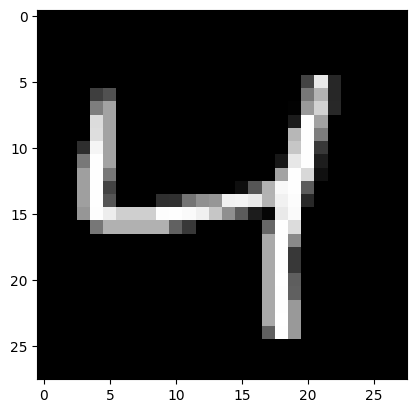

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[2].reshape(28, 28), cmap='gray')

x_train, y_train = preprocess_mnist(x_train, y_train)
x_test, y_test = preprocess_mnist(x_test, y_test)

### Building blocks (Sequantial API)



*   Dense = Fully connected layer ([Official docs](https://keras.io/api/layers/core_layers/dense/))
*   Activation = Activation function ([Official docs](https://keras.io/api/layers/activations/))
* Sequential = Group a set of layers sequentially ([Official docs](https://keras.io/api/models/sequential/))




In [18]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input

dims = x_train.shape[1]
print('Input Shape =', dims)

nb_classes = y_train.shape[1]
print('Number classes = Output Shape =', nb_classes)

model = Sequential()
model.add(Input((dims,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

Input Shape = 784
Number classes = Output Shape = 10


### Inspect the model structure

In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             170 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,818 (100.85 KB)

 Trainable params: 25,818 (100.85 KB)

 Non-trainable params: 0 (0.00 B)

### Compile the model

It is mandatory to compile a Keras model before training or using it! This function also requires some additional parameters:

* optimizer = Training optimizer ([Official docs](https://keras.io/api/optimizers/))
* loss = Loss function ([Official docs](https://keras.io/api/losses/))
* metrics = Metrics to be monitored during training ([Official docs](https://keras.io/api/metrics/))

In [21]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Train the model

And then train it!



In [22]:
model.fit(x_train, y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6304 - loss: 1.3196


### Predict

In [23]:
predictions = model.predict(x_test)

int_predictions = np.argmax(predictions, axis=1)

print(int_predictions[:10])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[7 2 1 0 4 1 4 9 6 9]


## ⭐ Hyperparameters



In [24]:
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist

def preprocess_mnist(x_train, y_train):
  x_train = x_train.reshape(x_train.shape[0], 28*28)
  x_train = x_train.astype('float32')
  x_train /= 255
  y_train = to_categorical(y_train)
  return x_train, y_train

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, y_train = preprocess_mnist(x_train, y_train)
x_test, y_test = preprocess_mnist(x_test, y_test)

### 🍔 Build the network

Hyperparameters:

* **optimizer**
* **learning_rate** = controls how much the model's weights are adjusted with respect to the gradient during each training step.

### Effects of learning rate value

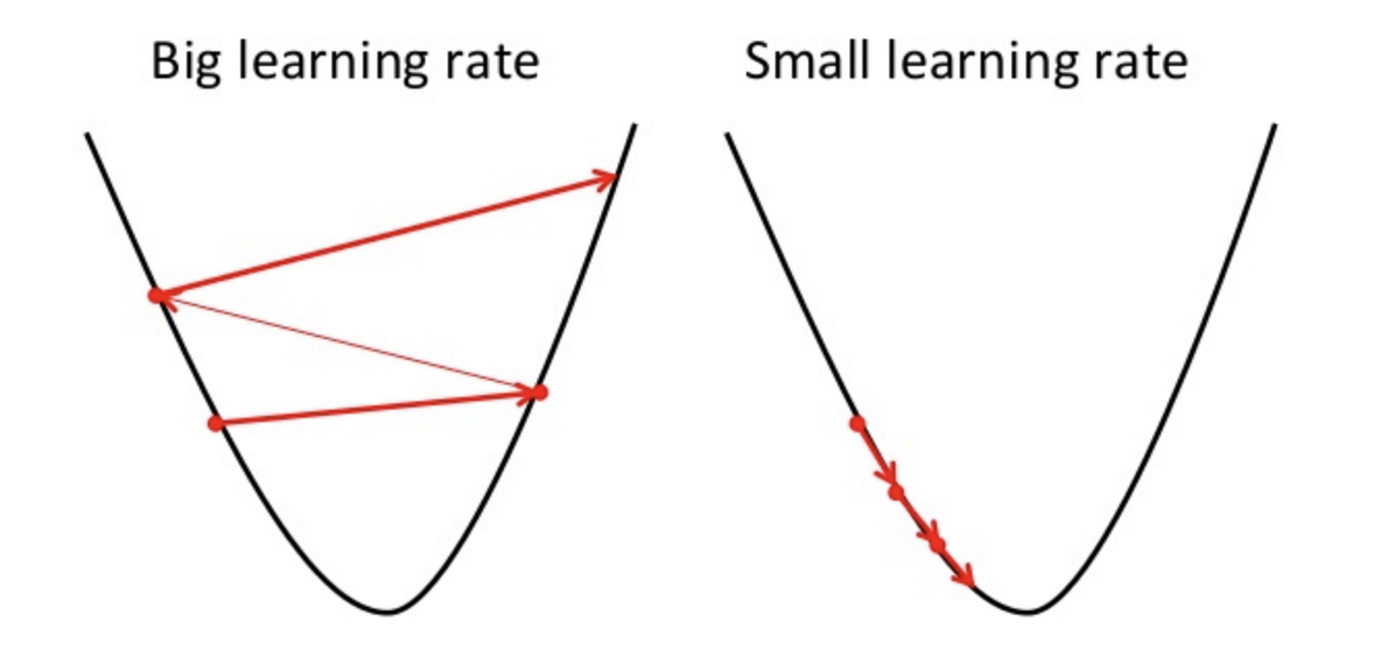

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

dims = x_train.shape[1]
print('Input Shape =', dims)

nb_classes = y_train.shape[1]
print('Number classes = Output Shape =', nb_classes)

model = Sequential()
model.add(Input((dims,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(nb_classes, activation='softmax'))

optimizer = SGD(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy',
              metrics=['accuracy'])

Input Shape = 784
Number classes = Output Shape = 10


### 🏋 Training

Hyperparameters:

* **batch_size** = dimension of the batch during (number of training elements considered before updating the weights during backpropagation).
* **epochs** = number of times the training is repeated.
* **validation_split** = percentage of the dimension of the validation set (it is also possible to specify the validation set itself)

In [30]:
history = model.fit(x_train, y_train, batch_size=128, epochs=50, validation_split=0.1)

Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8202 - loss: 0.7276 - val_accuracy: 0.8672 - val_loss: 0.5954
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8280 - loss: 0.6716 - val_accuracy: 0.8742 - val_loss: 0.5439
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8370 - loss: 0.6251 - val_accuracy: 0.8808 - val_loss: 0.5035
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8488 - loss: 0.5760 - val_accuracy: 0.8872 - val_loss: 0.4710
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8526 - loss: 0.5491 - val_accuracy: 0.8918 - val_loss: 0.4442
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8582 - loss: 0.5194 - val_accuracy: 0.8957 - val_loss: 0.4217
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8627 - loss: 0.5051 - val_accuracy: 0.8985 - val_loss: 0.4029
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8659 - loss: 0.4816 - val_accuracy: 0.

### 📊 Monitor training performance

It is usually useful to monitor performance during training to understand which hyperparameters need to be adjusted.

In [28]:
import matplotlib.pyplot as plt

def plot_loss(history):
  x_plot = list(range(1,len(history.history["loss"])+1))
  plt.figure()
  plt.title("Loss")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.plot(x_plot, history.history['loss'])
  plt.plot(x_plot, history.history['val_loss'])
  plt.legend(['Training', 'Validation'])

def plot_accuracy(history):
  x_plot = list(range(1,len(history.history["accuracy"])+1))
  plt.figure()
  plt.title("Accuracy")
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(x_plot, history.history['accuracy'])
  plt.plot(x_plot, history.history['val_accuracy'])
  plt.legend(['Training', 'Validation'])

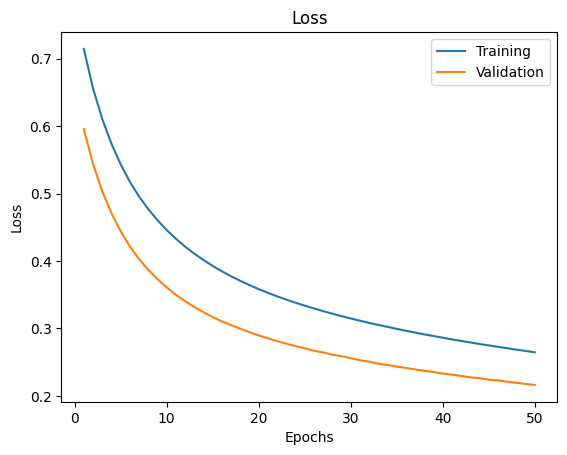

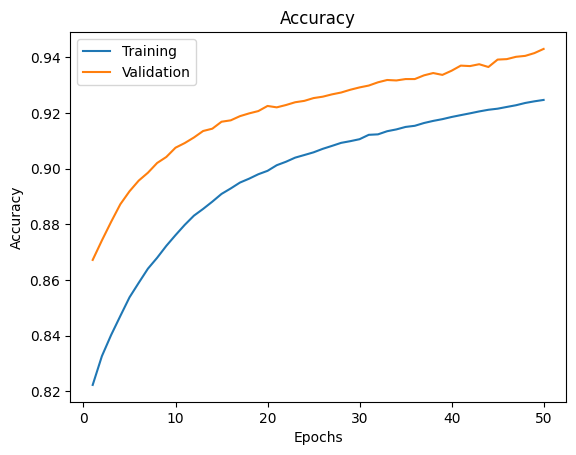

In [31]:
plot_loss(history)
plot_accuracy(history)

### Examples

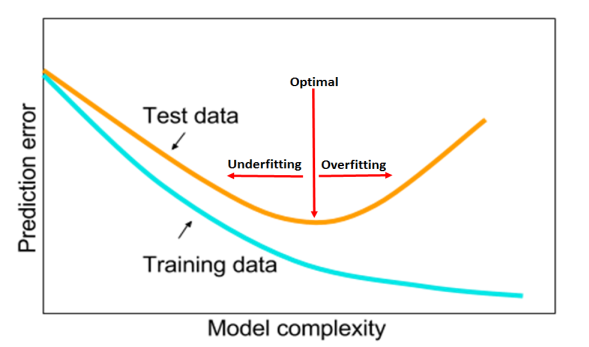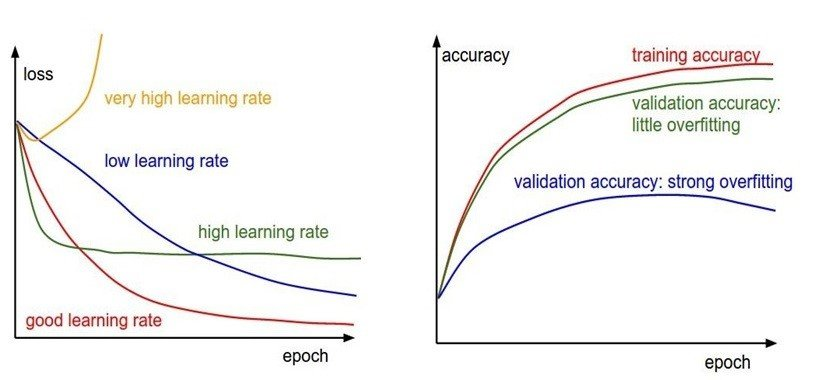

## 📕 Exercise

Take the dataset on elearning (from Kaggle) or one of the datasets available in keras ([here](https://keras.io/api/datasets/)) and play a bit with neural networks:



* Add some layers.
* Assign an activation function to each of them.
* Choose the values of the hyperparameters (batch_size, optimizer, learning_rate, epochs).
* Monitor the performance on a validation set and observe how the shape of the plot changes as one hyperparameter at a time is changed.
* Calculate the performance on the test set.

## Kaggle Challenge Data

>The Otto Group is one of the world’s biggest e-commerce companies, A consistent analysis of the performance of products is crucial. However, due to diverse global infrastructure, many identical products get classified differently.
For this competition, we have provided a dataset with 93 features for more than 200,000 products. The objective is to build a predictive model which is able to distinguish between our main product categories.
Each row corresponds to a single product. There are a total of 93 numerical features, which represent counts of different events. All features have been obfuscated and will not be defined any further.

https://www.kaggle.com/c/otto-group-product-classification-challenge/data

### Data Preparation

### Utility functions

Utility functions to load Kaggle Otto Group Challenge Data.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical



def load_data(path, train=True):
    """Load data from a CSV File

    Parameters
    ----------
    path: str
        The path to the CSV file

    train: bool (default True)
        Decide whether or not data are *training data*.
        If True, some random shuffling is applied.

    Return
    ------
    X: numpy.ndarray
        The data as a multi dimensional array of floats
    ids: numpy.ndarray
        A vector of ids for each sample
    """
    text = pd.read_csv(path, encoding = "ISO-8859-2")
    df = pd.read_csv(path)
    X = df.values.copy()
    if train:
        np.random.shuffle(X)
        X, labels = X[:, 1:-1].astype(np.float32), X[:, -1]
        return X, labels
    else:
        X, ids = X[:, 1:].astype(np.float32), X[:, 0].astype(str)
        return X, ids


def preprocess_data(X, scaler=None):
    """Preprocess input data by standardise features
    by removing the mean and scaling to unit variance"""
    if not scaler:
        scaler = StandardScaler()
        scaler.fit(X)
    X = scaler.transform(X)
    return X, scaler


def preprocess_labels(labels, encoder=None, categorical=True):
    """Encode labels with values among 0 and `n-classes-1`"""
    if not encoder:
        encoder = LabelEncoder()
        encoder.fit(labels)
    y = encoder.transform(labels).astype(np.int32)
    if categorical:
        y = to_categorical(y)
    return y, encoder

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Import data

In [1]:
url_train = 'https://raw.githubusercontent.com/leriomaggio/deep-learning-keras-tensorflow/master/data/kaggle_ottogroup/train.csv'
url_test = 'https://raw.githubusercontent.com/leriomaggio/deep-learning-keras-tensorflow/master/data/kaggle_ottogroup/test.csv'
X_train, labels = load_data(url_train, train=True)

print("Training set data")
print(X_train)

print("Training set labels")
print(labels)

NameError: name 'load_data' is not defined

### Preprocess data

In [ ]:
X_train, labels = load_data(url_train, train=True)
X_train, scaler = preprocess_data(X_train)
Y_train, encoder = preprocess_labels(labels)

X_test, ids = load_data(url_test, train=False)
X_test, _ = preprocess_data(X_test, scaler)

nb_classes = Y_train.shape[1]
print(nb_classes, 'classes')

dims = X_train.shape[1]
print(X_train.shape, 'dims Training set')